# ***Libraries***

In [30]:
import os
import random
import matplotlib.pyplot as plt
import pandas as pd
import json

# ***Time Series Data Generation***

In [6]:
def count_files_and_organize_by_subfolder(folder_path):
    subfolder_files = {}

    for subdir, _, files in os.walk(folder_path):
        subfolder_name = os.path.basename(subdir)
        if subfolder_name not in subfolder_files:
            subfolder_files[subfolder_name] = []

        subfolder_files[subfolder_name].extend(files)

    return subfolder_files

def print_subfolder_files_info(subfolder_files):
    for subfolder, files in subfolder_files.items():
        print(f"Subfolder: {subfolder}")
        #for file in files:
            #print(f"  File: {file}")
        print(f"Number of files in '{subfolder}': {len(files)}\n")

tsb_uad_pub_folder_path = '../TSB-UAD-Public/TSB-UAD-Public'
subfolder_files = count_files_and_organize_by_subfolder(tsb_uad_pub_folder_path)
del subfolder_files['TSB-UAD-Public']
print_subfolder_files_info(subfolder_files)

Subfolder: NASA-MSL
Number of files in 'NASA-MSL': 54

Subfolder: KDD21
Number of files in 'KDD21': 250

Subfolder: MITDB
Number of files in 'MITDB': 32

Subfolder: SVDB
Number of files in 'SVDB': 115

Subfolder: NASA-SMAP
Number of files in 'NASA-SMAP': 108

Subfolder: MGAB
Number of files in 'MGAB': 10

Subfolder: Genesis
Number of files in 'Genesis': 6

Subfolder: YAHOO
Number of files in 'YAHOO': 367

Subfolder: OPPORTUNITY
Number of files in 'OPPORTUNITY': 465

Subfolder: GHL
Number of files in 'GHL': 126

Subfolder: ECG
Number of files in 'ECG': 53

Subfolder: SMD
Number of files in 'SMD': 281

Subfolder: IOPS
Number of files in 'IOPS': 58

Subfolder: Occupancy
Number of files in 'Occupancy': 10

Subfolder: NAB
Number of files in 'NAB': 58

Subfolder: Dodgers
Number of files in 'Dodgers': 1

Subfolder: Daphnet
Number of files in 'Daphnet': 45

Subfolder: SensorScope
Number of files in 'SensorScope': 23



In [7]:
def create_normality_dicts(subfolder_files):
    # Create Normality_1
    normality_1 = {}
    for subfolder, files in subfolder_files.items():
        if files:
            num_files_to_take = min(random.randint(1, 3), len(files))
            normality_1[subfolder] = random.sample(files, num_files_to_take)
    
    # Create Normality_2
    normality_2 = {}
    subfolder_list = list(normality_1.keys())
    for i in range(len(subfolder_list)):
        for j in range(i + 1, len(subfolder_list)):
            subfolder_a = subfolder_list[i]
            subfolder_b = subfolder_list[j]
            files_a = normality_1[subfolder_a]
            files_b = normality_1[subfolder_b]
            if files_a and files_b:
                file_a = random.choice(files_a)
                file_b = random.choice(files_b)
                key = f"{file_a}+{file_b}"
                normality_2[key] = (subfolder_a, subfolder_b)
    
    # Create Normality_3
    normality_3 = {}
    for i in range(len(subfolder_list)):
        for j in range(i + 1, len(subfolder_list)):
            for k in range(j + 1, len(subfolder_list)):
                subfolder_a = subfolder_list[i]
                subfolder_b = subfolder_list[j]
                subfolder_c = subfolder_list[k]
                files_a = normality_1[subfolder_a]
                files_b = normality_1[subfolder_b]
                files_c = normality_1[subfolder_c]
                if files_a and files_b and files_c:
                    file_a = random.choice(files_a)
                    file_b = random.choice(files_b)
                    file_c = random.choice(files_c)
                    key = f"{file_a}+{file_b}+{file_c}"
                    normality_3[key] = (subfolder_a, subfolder_b, subfolder_c)

    return normality_1, normality_2, normality_3

In [8]:
normality_1, normality_2, normality_3 = create_normality_dicts(subfolder_files)

In [9]:
# Print the dictionaries
print("Normality_1:")
for subfolder, files in normality_1.items():
    print(f"{subfolder}: {files}")

print("\nNormality_2:")
for key, value in normality_2.items():
    print(f"{key}: {value}")

print("\nNormality_3:")
for key, value in normality_3.items():
    print(f"{key}: {value}")

Normality_1:
NASA-MSL: ['M-1.test.out']
KDD21: ['067_UCR_Anomaly_DISTORTEDinsectEPG3_5200_7000_7050.out', '051_UCR_Anomaly_DISTORTEDTkeepSecondMARS_3500_9330_9340.out']
MITDB: ['221.test.csv@2.out', '233.test.csv@1.out', '234.test.csv@1.out']
SVDB: ['847.test.csv@1.out', '858.test.csv@1.out', '893.test.csv@2.out']
NASA-SMAP: ['F-1.test.out', 'A-6.train.out', 'F-3.test.out']
MGAB: ['2.test.out', '6.test.out']
Genesis: ['genesis-anomalies.test.csv@1.out', 'genesis-anomalies.test.csv@13.out', 'genesis-anomalies.test.csv@17.out']
YAHOO: ['YahooA4Benchmark-TS15_data.out', 'Yahoo_A2synthetic_28_data.out']
OPPORTUNITY: ['S2-ADL3.test.csv@67.out']
GHL: ['22_Lev_fault_Temp_corr_seed_777_vars_23.test.csv@10.out', '20_Lev_fault_Temp_corr_seed_67_vars_23.test.csv@1.out']
ECG: ['MBA_ECG14046_data_29.out', 'MBA_ECG14046_data_22.out', 'MBA_ECG14046_data_25.out']
SMD: ['machine-3-8.test.csv@11.out', 'machine-3-11.test.csv@21.out']
IOPS: ['KPI-55f8b8b8-b659-38df-b3df-e4a5a8a54bc9.test.out']
Occupancy: 

In [10]:
def create_combined_dict(normality_1, normality_2, normality_3):
    combined_dict = {}
    counts = {"Normality_1": 0, "Normality_2": 0, "Normality_3": 0}

    # Adding from Normality_1
    for subfolder, files in normality_1.items():
        for file in files:
            if file not in combined_dict:
                combined_dict[file] = ["Normality_1", subfolder]
                counts["Normality_1"] += 1

    # Adding from Normality_2
    for key, subfolders in normality_2.items():
        if key not in combined_dict:
            combined_dict[key] = ["Normality_2", subfolders[0], subfolders[1]]
            counts["Normality_2"] += 1

    # Adding from Normality_3
    for key, subfolders in normality_3.items():
        if key not in combined_dict:
            combined_dict[key] = ["Normality_3", subfolders[0], subfolders[1], subfolders[2]]
            counts["Normality_3"] += 1

    return combined_dict, counts

In [11]:
combined_dict, counts = create_combined_dict(normality_1, normality_2, normality_3)

In [12]:
# Print the counts of filenames from each normality
print("\nCounts of filenames from each normality:")
for normality, count in counts.items():
    print(f"{normality}: {count}")


Counts of filenames from each normality:
Normality_1: 36
Normality_2: 153
Normality_3: 816


In [13]:
# Predefined number of items to take from each normality
normality_1_count = 5
normality_2_count = 5
normality_3_count = 5

In [14]:
def create_predefined_dict(combined_dict, normality_1_count, normality_2_count, normality_3_count):
    predefined_dict = {"Normality_1": {}, "Normality_2": {}, "Normality_3": {}}
    
    # Extracting specific numbers of items from each normality type
    normality_1_items = [item for item in combined_dict.items() if item[1][0] == "Normality_1"]
    normality_2_items = [item for item in combined_dict.items() if item[1][0] == "Normality_2"]
    normality_3_items = [item for item in combined_dict.items() if item[1][0] == "Normality_3"]
    
    # Select predefined numbers of items
    selected_normality_1_items = random.sample(normality_1_items, min(normality_1_count, len(normality_1_items)))
    selected_normality_2_items = random.sample(normality_2_items, min(normality_2_count, len(normality_2_items)))
    selected_normality_3_items = random.sample(normality_3_items, min(normality_3_count, len(normality_3_items)))
    
    # Combine selected items into the predefined_dict
    predefined_dict["Normality_1"] = dict(selected_normality_1_items)
    predefined_dict["Normality_2"] = dict(selected_normality_2_items)
    predefined_dict["Normality_3"] = dict(selected_normality_3_items)
    
    # Combine all selected items into a single dictionary
    all_selected_items = selected_normality_1_items + selected_normality_2_items + selected_normality_3_items
    
    # Shuffle the combined selected items
    random.shuffle(all_selected_items)
    
    # Convert to a dictionary
    shuffled_dict = dict(all_selected_items)
    
    return shuffled_dict

In [15]:
predefined_shuffled_dict = create_predefined_dict(combined_dict, normality_1_count, normality_2_count, normality_3_count)

In [16]:
# Print the shuffled dictionary
print("Predefined Shuffled Dictionary:")
for key, value in predefined_shuffled_dict.items():
    print(f"{key}: {value}")

Predefined Shuffled Dictionary:
6.test.out: ['Normality_1', 'MGAB']
858.test.csv@1.out+101-freeway-traffic.test.out: ['Normality_2', 'SVDB', 'Dodgers']
machine-3-8.test.csv@11.out+101-freeway-traffic.test.out: ['Normality_2', 'SMD', 'Dodgers']
S03R02E0.test.csv@6.out: ['Normality_1', 'Daphnet']
NAB_data_art1_4.out: ['Normality_1', 'NAB']
051_UCR_Anomaly_DISTORTEDTkeepSecondMARS_3500_9330_9340.out+20_Lev_fault_Temp_corr_seed_67_vars_23.test.csv@1.out: ['Normality_2', 'KDD21', 'GHL']
221.test.csv@2.out+KPI-55f8b8b8-b659-38df-b3df-e4a5a8a54bc9.test.out+room-occupancy.train.csv@4.out: ['Normality_3', 'MITDB', 'IOPS', 'Occupancy']
MBA_ECG14046_data_25.out: ['Normality_1', 'ECG']
M-1.test.out: ['Normality_1', 'NASA-MSL']
room-occupancy-0.test.csv@2.out+NAB_data_art1_4.out: ['Normality_2', 'Occupancy', 'NAB']
893.test.csv@2.out+KPI-55f8b8b8-b659-38df-b3df-e4a5a8a54bc9.test.out+room-occupancy-0.test.csv@2.out: ['Normality_3', 'SVDB', 'IOPS', 'Occupancy']
genesis-anomalies.test.csv@17.out+KPI-5

In [17]:
def create_files_and_new_dict(predefined_shuffled_dict, base_folder):
    new_dict = {}
    id_counter = 1

    for key, value in predefined_shuffled_dict.items():
        new_filename = f"ts{id_counter}"
        new_filepath = os.path.join('Time-Series-Data-Files/', new_filename)
        
        if value[0] == "Normality_1":
            subfolder = value[1]
            original_filepath = os.path.join(base_folder, subfolder, key)
            with open(original_filepath, 'r') as original_file:
                content = original_file.read()
            with open(new_filepath, 'w') as new_file:
                new_file.write(content)
        
        elif value[0] == "Normality_2":
            subfolder1, subfolder2 = value[1], value[2]
            file1, file2 = key.split('+')
            filepath1 = os.path.join(base_folder, subfolder1, file1)
            filepath2 = os.path.join(base_folder, subfolder2, file2)
            with open(filepath1, 'r') as f1, open(filepath2, 'r') as f2:
                content = f1.read() + f2.read()
            with open(new_filepath, 'w') as new_file:
                new_file.write(content)
        
        elif value[0] == "Normality_3":
            subfolder1, subfolder2, subfolder3 = value[1], value[2], value[3]
            file1, file2, file3 = key.split('+')
            filepath1 = os.path.join(base_folder, subfolder1, file1)
            filepath2 = os.path.join(base_folder, subfolder2, file2)
            filepath3 = os.path.join(base_folder, subfolder3, file3)
            with open(filepath1, 'r') as f1, open(filepath2, 'r') as f2, open(filepath3, 'r') as f3:
                content = f1.read() + f2.read() + f3.read()
            with open(new_filepath, 'w') as new_file:
                new_file.write(content)
        
        new_dict[new_filename] = value
        id_counter += 1
    
    return new_dict

In [18]:
# Create files and the new dictionary
new_files_dict = create_files_and_new_dict(predefined_shuffled_dict, '../TSB-UAD-Public/TSB-UAD-Public')

In [19]:
# Print the new dictionary
print("New Dictionary with Generated Files:")
for key, value in new_files_dict.items():
    print(f"{key}: {value}")

New Dictionary with Generated Files:
ts1: ['Normality_1', 'MGAB']
ts2: ['Normality_2', 'SVDB', 'Dodgers']
ts3: ['Normality_2', 'SMD', 'Dodgers']
ts4: ['Normality_1', 'Daphnet']
ts5: ['Normality_1', 'NAB']
ts6: ['Normality_2', 'KDD21', 'GHL']
ts7: ['Normality_3', 'MITDB', 'IOPS', 'Occupancy']
ts8: ['Normality_1', 'ECG']
ts9: ['Normality_1', 'NASA-MSL']
ts10: ['Normality_2', 'Occupancy', 'NAB']
ts11: ['Normality_3', 'SVDB', 'IOPS', 'Occupancy']
ts12: ['Normality_3', 'Genesis', 'IOPS', 'SensorScope']
ts13: ['Normality_3', 'Occupancy', 'Dodgers', 'SensorScope']
ts14: ['Normality_2', 'GHL', 'SMD']
ts15: ['Normality_3', 'SVDB', 'ECG', 'SensorScope']


In [31]:
# Save dictionary to a JSON file
with open('Time-Series-Data-Dictionary.json', 'w') as json_file:
    json.dump(new_files_dict, json_file, indent=4)

# ***Generated TS Plots***
Let's plot the time-series files to get an idea of what files were chosen.

In [ ]:
# Function to plot time-series data from files
def plot_time_series(file_dict, data_folder):
    for filename, info in file_dict.items():
        # Construct the full path to the file
        file_path = os.path.join(data_folder, filename)
        
        # Read the time-series data (assuming it's a CSV file)
        # Adjust the reading method if your file format is different
        try:
            data = pd.read_csv(file_path)
        except FileNotFoundError:
            print(f"File not found: {file_path}")
            continue
        
        # Assuming the time-series data is in the first column
        time_series = data.iloc[:, 0]
        
        # Extract information for the plot title
        normality = info[0]
        subfolders = ", ".join(info[1:])
        
        # Plot the time-series data
        plt.figure()
        plt.plot(time_series)
        plt.title(f"Filename: {filename}\nNormality: {normality}\nSubfolders: {subfolders}")
        plt.xlabel('Time')
        plt.ylabel('Value')
        
        # Display the plot
        plt.show()

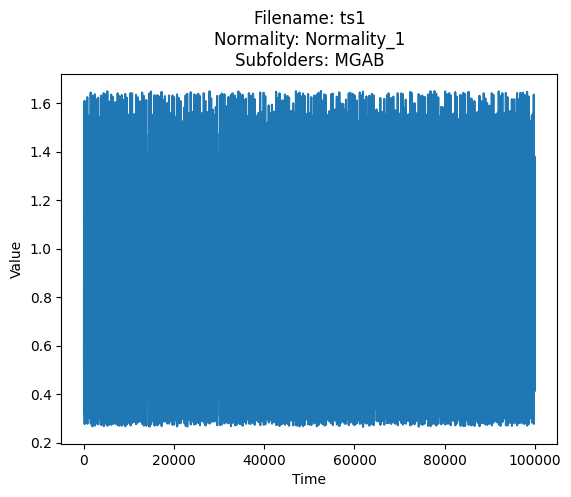

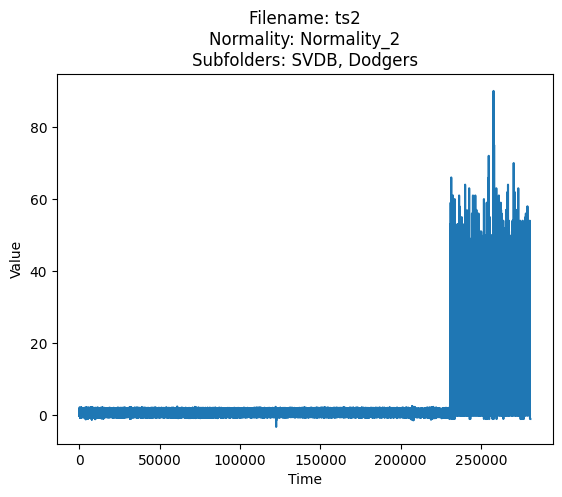

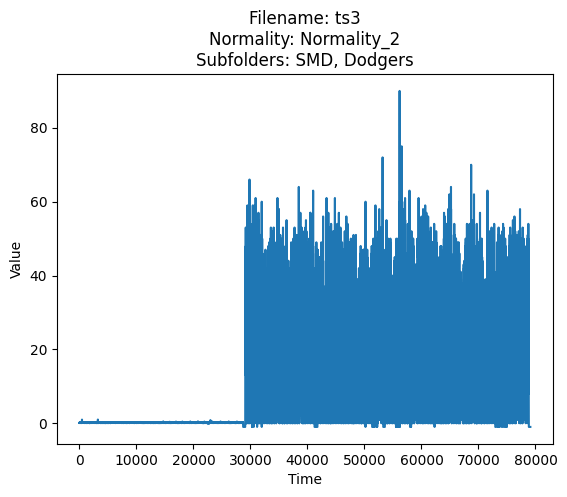

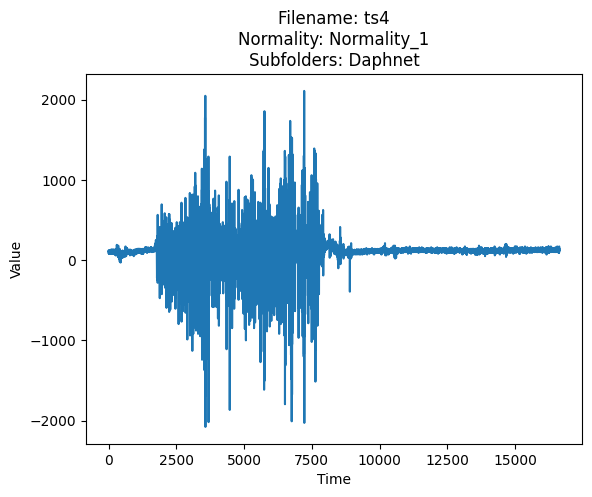

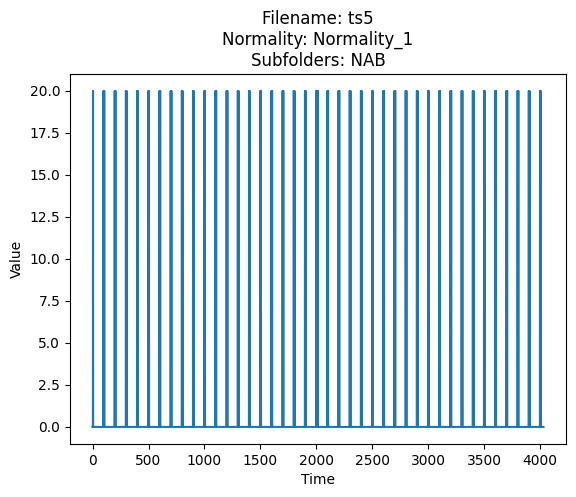

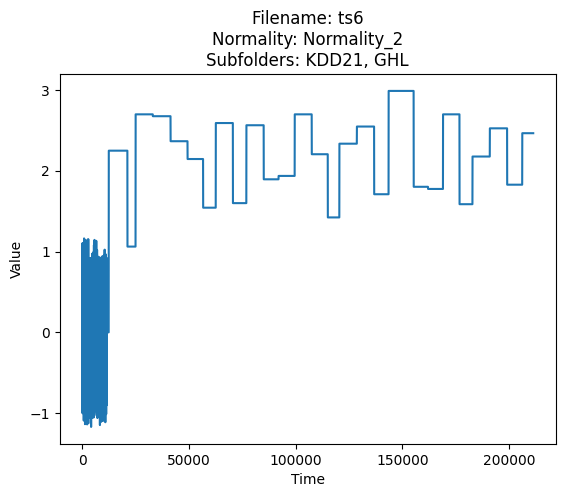

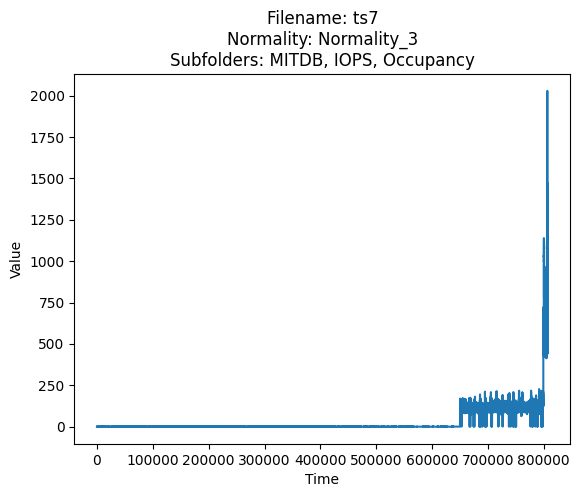

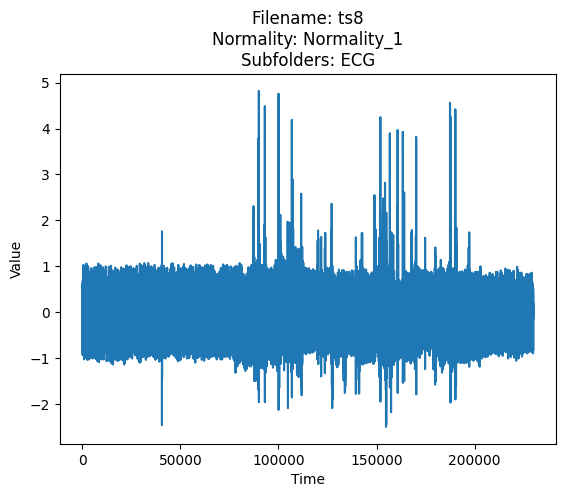

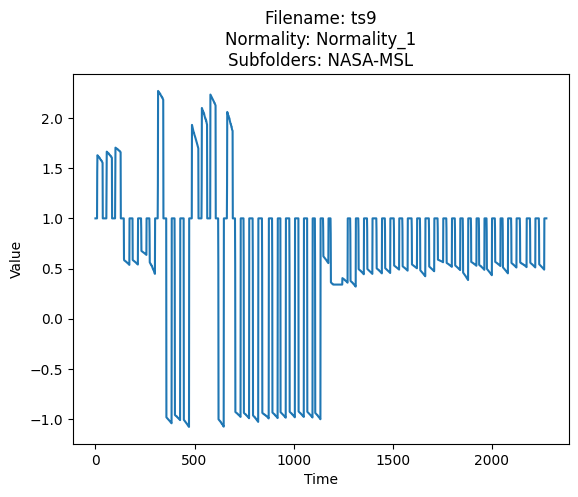

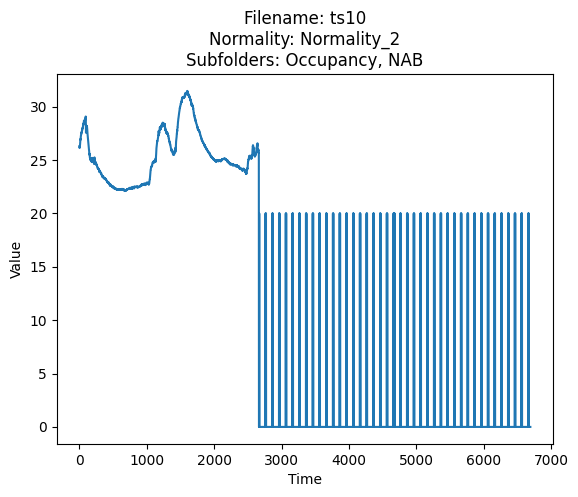

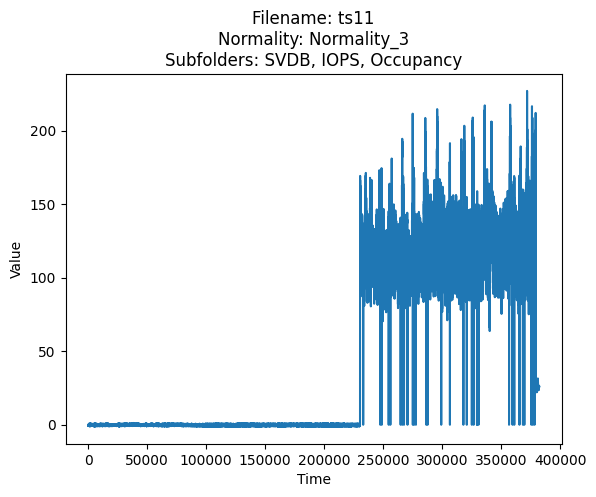

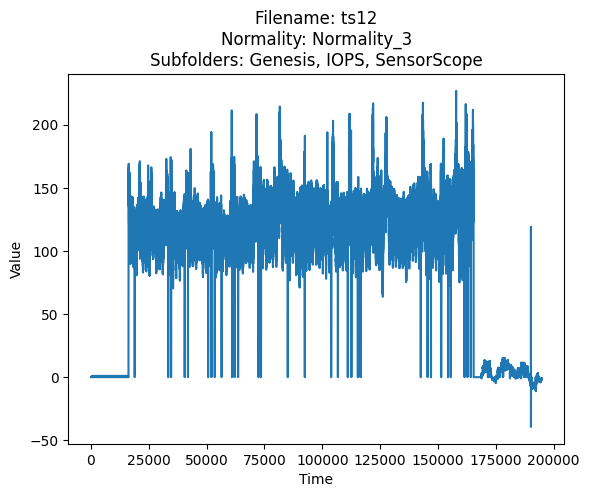

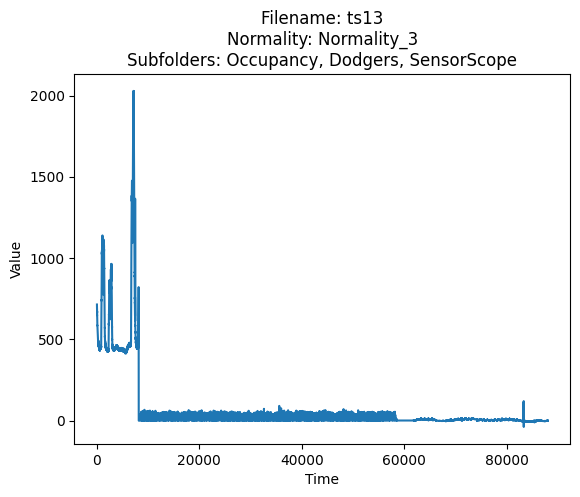

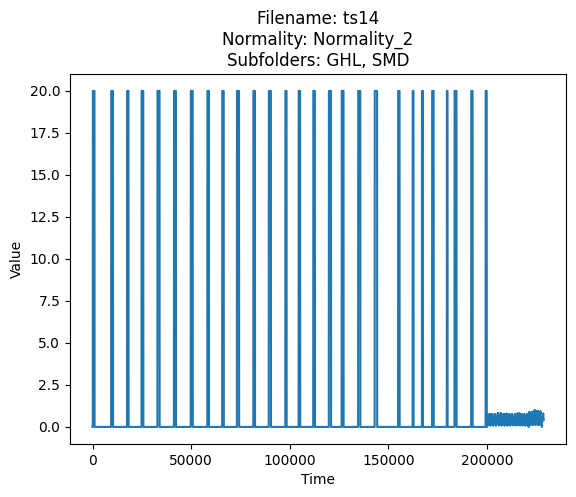

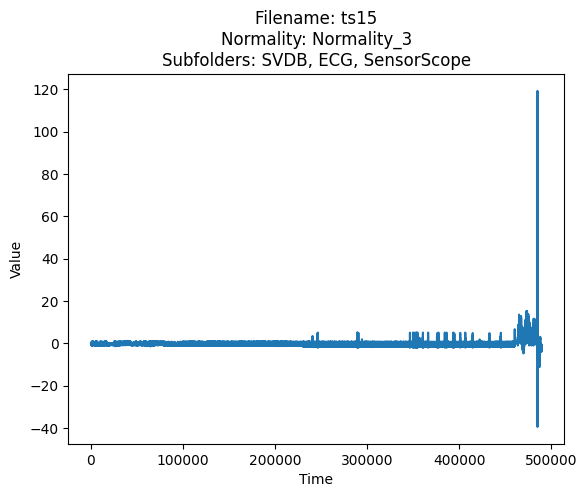

In [29]:
plot_time_series(new_files_dict, 'Time-Series-Data-Files/')